# Anomaly Detection

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler


## Load Dataset

In [2]:
# load dataset
train_data = pd.read_csv('./data/Train.csv')
test_data = pd.read_csv('./data/Test.csv')
submission_data = pd.read_csv('./data/Sample_submission.csv')

In [4]:
train_data.info()
print("--"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 1558 entries, feature_1 to feature_1558
dtypes: float64(4), int64(1554)
memory usage: 9.0 MB


In [5]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.isnull().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_1555    0
feature_1556    0
feature_1557    0
feature_1558    0
Class           0
Length: 1559, dtype: int64

## Feature Engineering

In [14]:
# coloumn data type
non_binary_data = train_data.loc[:, 'feature_1':'feature_3'] 
binary_data = train_data.loc[:, 'feature_4': 'feature_1558']

In [10]:
non_binary_data

,feature_1,feature_2,feature_3
0,100,160,1.6000
1,20,83,4.1500
2,99,150,1.5151
3,40,40,1.0000
4,12,234,19.5000
...,...,...,...
1758,1,1,2.0000
1759,40,200,5.0000
1760,96,218,2.2708
1761,16,81,5.0625


In [12]:
binary_data

,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


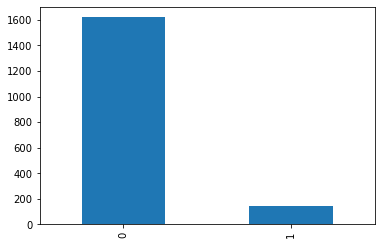

In [15]:
# Class distribution
train_data['Class'].value_counts().plot(kind='bar')

In [16]:
wafer_data = pd.concat([non_binary_data, train_data['Class']], axis=1)

In [17]:
wafer_data.head()

,feature_1,feature_2,feature_3,Class
0,100,160,1.6000,0
1,20,83,4.1500,0
2,99,150,1.5151,0
3,40,40,1.0000,0
4,12,234,19.5000,0


## Linearly Dependent and Independent Variables

There is a linear dependency between the variables feature_1, feature_2 and feature_3. 

**Dependent Variable**

The feature_3 is a dependent variable of feature_2, feature_1 

$$feature_3 = feature_2 \div feature_1$$

<Figure size 720x504 with 0 Axes>

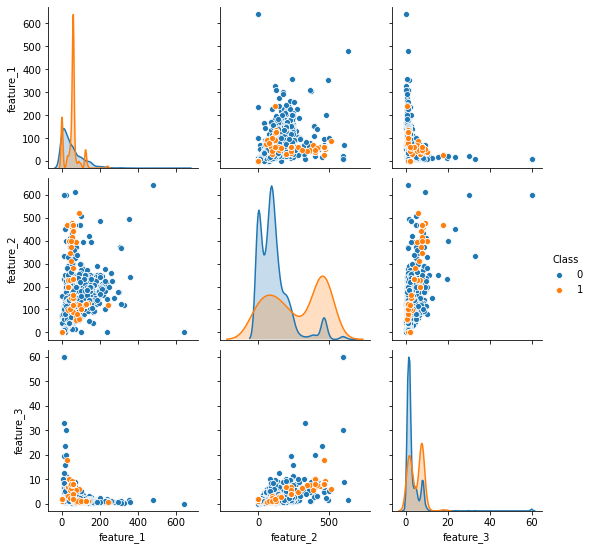

In [20]:
# Pair plot
fig = plt.figure(figsize=(10,7))

sns.pairplot(wafer_data, diag_kind='kde', hue='Class')

plt.show()

## Standardize the data

In [40]:
def z_standardize(x_data):
    # Z score scaler
    z_scaler = StandardScaler()
    
    z_scaler.fit(x_data)
    
    x_scaled = z_scaler.transform(x_data)
    
    return x_scaled

def minmax_normalize(x_train, x_test):
    # Minmax normalization
    z_scaler = StandardScaler()
    
    z_scaler.fit(x_data)
    
    x_scaled = z_scaler.transform(x_data)
    
    return x_scaled

# Scale the data
x_train = wafer_data.iloc[:, :-1]

scaled_df = wafer_data.copy()

scaled_df[['feature_1', 'feature_2', 'feature_3']] = z_standardize(x_train)